# Scapulo-Humeral Computation
- [github link](https://github.com/romainmartinez/SHR)

In [1]:
# Common imports
import scipy.io as sio
import numpy as np
import spm1d

# Figures
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# to make this notebook's output stable across runs
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [2]:
DATA_PATH = '/media/romain/E/projet_SHR/data/'
DATA_FORMAT = 'mat_without_correction_10hz'

AREA = np.arange(1, 100)

## 0. import data

In [3]:
mat = sio.loadmat(f'{DATA_PATH}{DATA_FORMAT}.mat')['data']

In [4]:
y, TH, weight, participants, sex = [mat[i][0][0] for i in ['y', 'TH', 'weight', 'participants', 'sex']]

# keep only AREA
y = y[:, AREA].copy()

# reshape to vector
weight, participants, sex = [i.flatten() for i in [weight, participants, sex]]

In [5]:
# replace nan by mean of same sex/weight
for isex in np.unique(sex):
    for iweight in np.unique(weight):
        idx = ((sex == isex) & (weight == iweight)).flatten()
        mean_vector = np.nanmean(y[idx, :], axis=0)
        y[idx, :] = np.where(np.isnan(y[idx, :]), mean_vector, y[idx, :])

## 1. stats

In [6]:
alpha = 0.05
iterations = 10000

a_spm = spm1d.stats.nonparam.anova2(y, sex, weight)
a_spmi = a_spm.inference(alpha, iterations=iterations)
print(a_spmi)

SnPM{F} inference list
   design      :  ANOVA2
   nEffects    :  3
   nPermUnique :  -1 permutations possible
Effects:
   A     z=(1x99) array       h0reject=True
   B     z=(1x99) array       h0reject=True
   AB    z=(1x99) array       h0reject=False



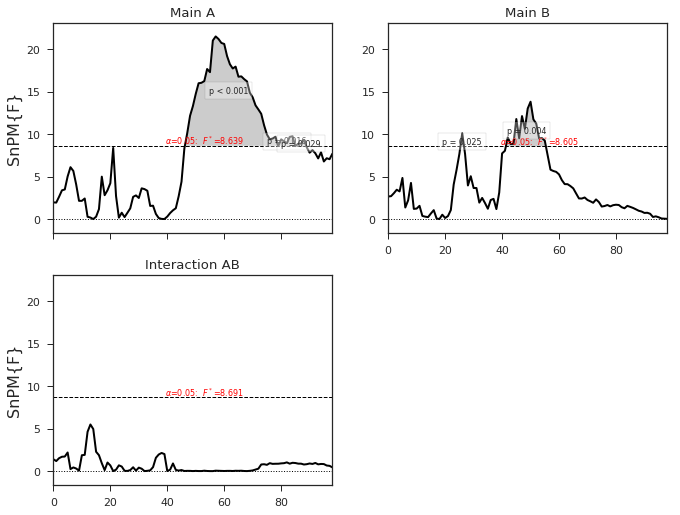

In [20]:
fig, ax = plt.subplots(figsize=(11, 8.5))

a_spmi.plot(plot_threshold_label=True, plot_p_values=True, autoset_ylim=True)
plt.show()

fig.savefig(f'./share/fig/spm.pdf', transparent=True)

In [32]:
a_spmi.print_verbose()

SnPM{F} inference list
   design      :  ANOVA2
   nEffects    :  3
   nPermUnique :  -1 permutations possible

SnPM{F} inference field
   SPM.effect         :  Main A
   SPM.z              :  (1x99) raw test stat field
   SnPM.nPermUnique   :  -1 permutations possible
Inference:
   SPM.alpha          :  0.050
   SPM.zstar          :  8.63889
   SPM.h0reject       :  True
   SPM.p              :  (<0.001, 0.016, 0.029)

SnPM{F} inference field
   SPM.effect         :  Main B
   SPM.z              :  (1x99) raw test stat field
   SnPM.nPermUnique   :  -1 permutations possible
Inference:
   SPM.alpha          :  0.050
   SPM.zstar          :  8.60502
   SPM.h0reject       :  True
   SPM.p              :  (0.025, 0.004)

SnPM{F} inference field
   SPM.effect         :  Interaction AB
   SPM.z              :  (1x99) raw test stat field
   SnPM.nPermUnique   :  -1 permutations possible
Inference:
   SPM.alpha          :  0.050
   SPM.zstar          :  8.69110
   SPM.h0reject       :  False


(100,)

In [75]:
def get_cluster(spm, drop_non_significative=False):
    signi = np.abs(spm.z) >= spm.zstar
    
    if drop_non_significative:
        spm.z[~signi] = np.nan
    else:
        plot_array = spm.z
       
    plt.pcolormesh(np.arange(1, 101), np.repeat(1, 100), spm.z, antialiased=True)
    
    plt.colorbar(pad=.08)
    
    plt.show()

get_cluster(a_spmi[0], drop_non_significative=True)

/home/romain/miniconda3/envs/envergo/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater_equal
  from ipykernel import kernelapp as app


ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
for i in len(a_spmi):
    

In [56]:
xi = a_spmi[0]
xi.nClusters

3

In [60]:
np.argwhere(xi.z > xi.zstar)

array([[47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],
       [78],
       [80],
       [81],
       [82],
       [83],
       [84],
       [86],
       [87],
       [88]])

In [58]:
xi.clusters

[Cluster (NonParam)
    threshold       :  8.639
    centroid        :  (61.607, 15.091)
    isinterpolated  :  True
    iswrapped       :  False
    endpoints       :  (46.183, 78.964)
    extent          :  32.782
    metric          :  ClusterIntegral
    metric_value    :  219.36178
    nPermUnique     :  -1 unique permutations possible
    nPermActual     :  10000 actual permutations
    P               :  0.00033
 , Cluster (NonParam)
    threshold       :  8.639
    centroid        :  (82.022, 9.171)
    isinterpolated  :  True
    iswrapped       :  False
    endpoints       :  (79.049, 84.968)
    extent          :  5.919
    metric          :  ClusterIntegral
    metric_value    :  3.72603
    nPermUnique     :  -1 unique permutations possible
    nPermActual     :  10000 actual permutations
    P               :  0.01593
 , Cluster (NonParam)
    threshold       :  8.639
    centroid        :  (86.996, 8.876)
    isinterpolated  :  True
    iswrapped       :  False
    endpo

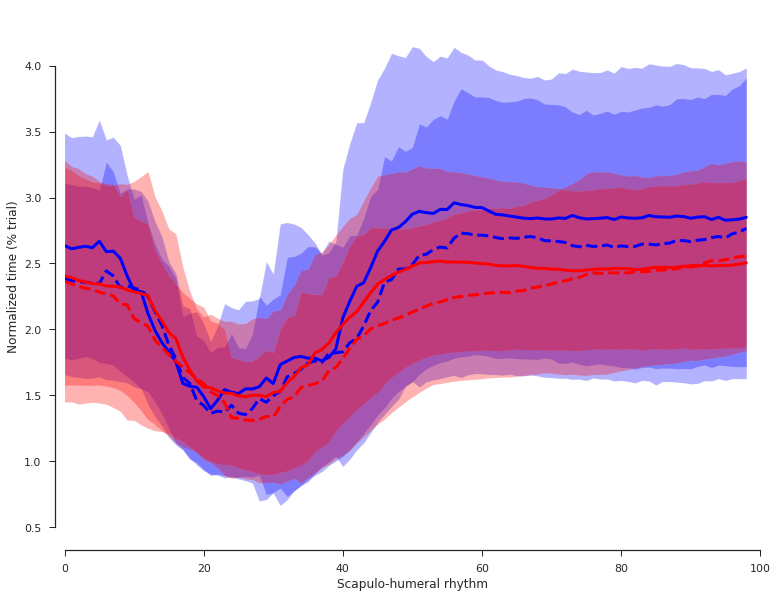

In [21]:
fig, ax = plt.subplots(figsize=(11, 8.5))

spm1d.plot.plot_mean_sd(y[(sex == 1) & (weight == 6), :],
                        linecolor='b', facecolor='b', alpha=.3)
rect2 = plt.patches.Rectangle((0,150), 300, 20, color='red')
spm1d.plot.plot_mean_sd(y[(sex == 1) & (weight == 12), :],
                        linecolor='b', linestyle='--', facecolor='b', alpha=.3)
spm1d.plot.plot_mean_sd(y[(sex == 2) & (weight == 6), :],
                        linecolor='r', facecolor='r', alpha=.3)
spm1d.plot.plot_mean_sd(y[(sex == 2) & (weight == 12), :],
                        linecolor='r', linestyle='--', facecolor='r', alpha=.3)

ax.set_xlabel('Scapulo-humeral rhythm')
ax.set_ylabel('Normalized time (% trial)')
ax.xaxis.set_ticks(np.linspace(0, 100, num=6))

sns.despine(offset=10, trim=True)
fig.tight_layout()

fig.savefig(f'./share/fig/rhythm.pdf', transparent=True)

plt.show()

In [87]:
x = np.linspace(0, 4. * np.pi, 100)
y = np.repeat(0, 100)

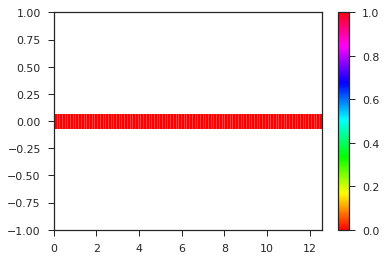

In [94]:
fig, ax = plt.subplots()
lc = colorline(x, y, 0, cmap='hsv', linewidth=15)
plt.colorbar(lc)
plt.xlim(x.min(), x.max())
plt.ylim(-1.0, 1.0)
plt.show()

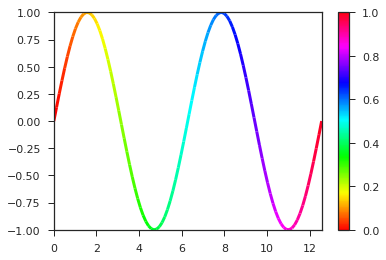

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll

def multicolored_lines():
    x = np.linspace(0, 4. * np.pi, 100)
    y = np.sin(x)
    fig, ax = plt.subplots()
    lc = colorline(x, y, cmap='hsv')
    plt.colorbar(lc)
    plt.xlim(x.min(), x.max())
    plt.ylim(-1.0, 1.0)
    plt.show()

def colorline(
        x, y, z=None, cmap='copper', norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    # to check for numerical input -- this is a hack
    if not hasattr(z, "__iter__"):
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

multicolored_lines()